# Defining Process for rho

### Imports
#### Import all necessary libraries and dependencies.

In [154]:
from QuantLib import *

In [155]:
today = Date(24,12,2016)
Settings.instance().evaluationDate = today

In [156]:
u = SimpleQuote(100.0)
r = SimpleQuote(0.01)
sigma = SimpleQuote(0.20)

In [157]:
risk_free_curve = FlatForward(today, QuoteHandle(r), Actual360())
volatility = BlackConstantVol(today, TARGET(), QuoteHandle(sigma), Actual360())

### Parameters Option modeling
#### Construct a process that will use BlackScholesProcess and will set dividend yield to 0

In [158]:
process_1 = BlackScholesProcess(QuoteHandle(u), YieldTermStructureHandle(risk_free_curve), BlackVolTermStructureHandle(volatility))

In [159]:
print(process_1.dividendYield().zeroRate(1.0, Continuous).rate())


0.0


In [160]:
process_2 = BlackProcess(QuoteHandle(u),YieldTermStructureHandle(risk_free_curve), BlackVolTermStructureHandle(volatility)) 
print(process_2.riskFreeRate().zeroRate(1.0, Continuous).rate())
print(process_2.dividendYield().zeroRate(1.0, Continuous).rate())

0.009999999999999893
0.009999999999999893


In [161]:
process_3 = BlackProcess(QuoteHandle(u),YieldTermStructureHandle(risk_free_curve), BlackVolTermStructureHandle(volatility)) 
print(process_3.riskFreeRate().zeroRate(1.0, Continuous).rate())
print(process_3.dividendYield().zeroRate(1.0, Continuous).rate())

0.009999999999999893
0.009999999999999893


In [162]:
option_1 = EuropeanOption(PlainVanillaPayoff(Option.Call, 100.0), EuropeanExercise(today+100))
option_1.setPricingEngine(AnalyticEuropeanEngine(process_1))
print(option_1.NPV())

4.337597216336533


In [163]:
option_2 = EuropeanOption(PlainVanillaPayoff(Option.Call, 100.0), EuropeanExercise(today+100))
option_2.setPricingEngine(AnalyticEuropeanEngine(process_2))
print(option_2.NPV())

4.191615257389808


In [164]:
option_3 = EuropeanOption(PlainVanillaPayoff(Option.Call, 200.0),EuropeanExercise(today+100))
option_3.setPricingEngine(AnalyticEuropeanEngine(process_3))
print(option_3.NPV())

5.236133711607838e-11


### Greeks Calculations
#### Calculate greeks using the options we constructed earlier.

In [165]:
def greek(option, quote, dx): 
    x0 = quote.value()
    quote.setValue(x0+dx) 
    P_u = option.NPV() 
    quote.setValue(x0-dx) 
    P_d = option.NPV() 
    quote.setValue(x0) 
    return (P_u-P_d)/(2*dx)

### Measuring delta derivatives
#### Let's measure the sensitivity of the options that we created using the standard delta hedging formula
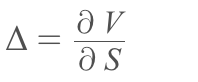

In [166]:
# First Option Delta change derivative
print(option_1.delta())
print(greek(option_1, u, 0.01))

0.5315063340142601
0.531506323010289


In [167]:
# Second option Delta change derivative
print(option_2.delta())
print(greek(option_2, u, 0.01))

0.5195711146255227
0.5195711052036867


In [168]:
# Third option Delta change derivative
print(option_3.delta())
print(greek(option_3, u, 0.01))

3.434651870104447e-11
3.4346740558503026e-11


### Calculating Vega greeks for sensitivity for option price volatility
#### Lets measure the vega with this formula:
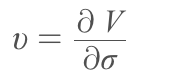

In [181]:
# First option vega change derivative
print(option_1.vega())
print(greek(option_1, sigma, 0.001))

20.96050033373808
20.960499909565833


In [182]:
# Second option vega change derivative
print(option_2.vega())
print(greek(option_2, sigma, 0.001))

20.938677847075486
20.938677605407463


In [183]:
# Third option vega change derivative
print(option_3.vega())
print(greek(option_3, sigma, 0.001))

20.938677847075486
20.938677605407463


### Calculating rho Process
#### We will measure the rho because the sensitivity of option price to interest rates.
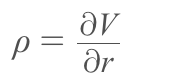

In [184]:
# First option rho change derivative
print(option_1.rho())
print(greek(option_1, r, 0.001))

13.559176718080407
13.55917453385036


In [185]:
# Second option rho change derivative
print(option_2.rho())
print(greek(option_2, r, 0.001))

13.268193390322908
-1.1643375864700545


In [186]:
# Third option rho change derivative
print(option_3.rho())
print(greek(option_3, r, 0.001))

13.268193390322908
-1.1643375864700545


##### The pricing engine works with the general process and p is calculated:
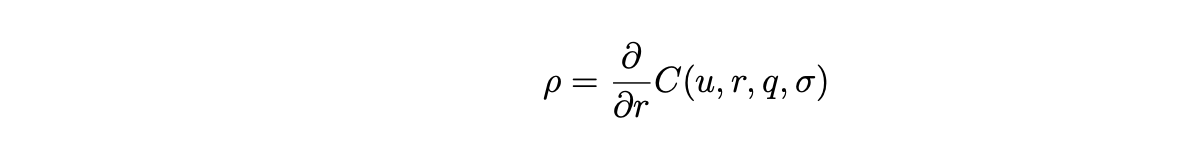

#### With that, the correct formula is:
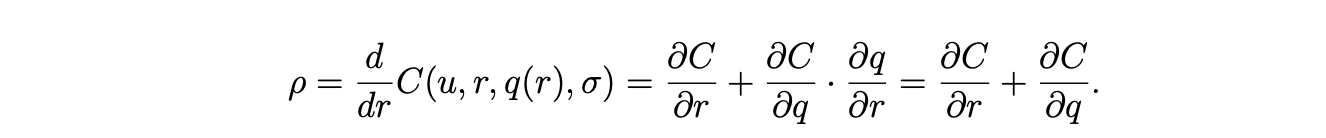

In [187]:
print(option_1.rho() + option_1.dividendRho())
print(greek(option_1, r, 0.001))

-1.0026406521732891
13.55917453385036


In [188]:
print(option_2.rho() + option_2.dividendRho())
print(greek(option_2, r, 0.001))

-1.1643375714971693
-1.1643375864700545


In [189]:
print(option_3.rho() + option_3.dividendRho())
print(greek(option_3, r, 0.001))

-1.1643375714971693
-1.1643375864700545


In [190]:
process_3 = BlackScholesMertonProcess(QuoteHandle(u),YieldTermStructureHandle(risk_free_curve),YieldTermStructureHandle(risk_free_curve), BlackVolTermStructureHandle(volatility))
option_3 = EuropeanOption(PlainVanillaPayoff(Option.Call, 100.0), EuropeanExercise(today+100))
option_3.setPricingEngine(AnalyticEuropeanEngine(process_3))

In [191]:
print(option_3.delta())
print(greek(option_3, u, 0.01))

0.5195711146255227
0.5195711052036867


In [192]:
print(option_3.rho())
print(greek(option_3, r, 0.001))
print(option_3.rho() + option_3.dividendRho())

13.268193390322908
-1.1643375864700545
-1.1643375714971693
